In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [9]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [10]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [11]:
img = load_img()

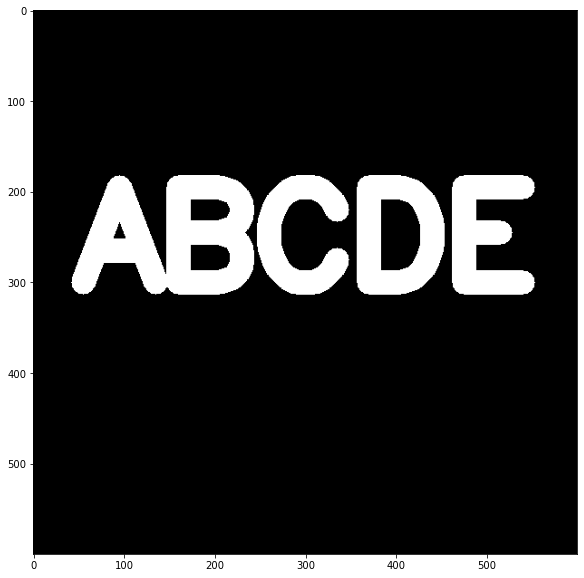

In [20]:
display_img(img)

In [21]:
kernel = np.ones((5,5),dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [23]:
result = cv2.erode(img, kernel, iterations=1)

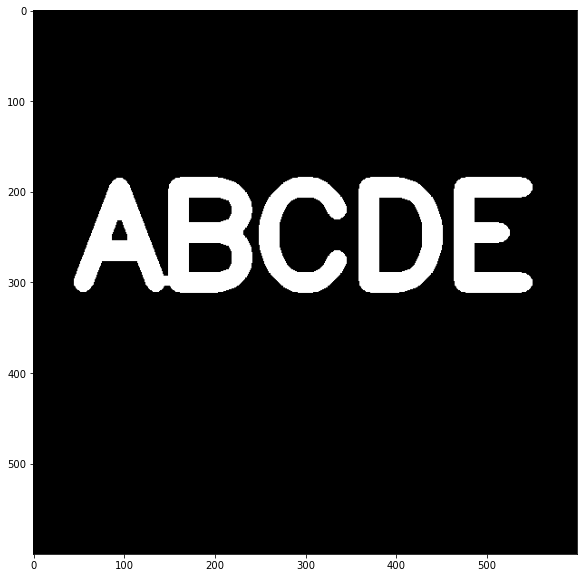

In [24]:
display_img(result)

In [36]:
img = load_img()

In [37]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

In [38]:
white_noise

array([[1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

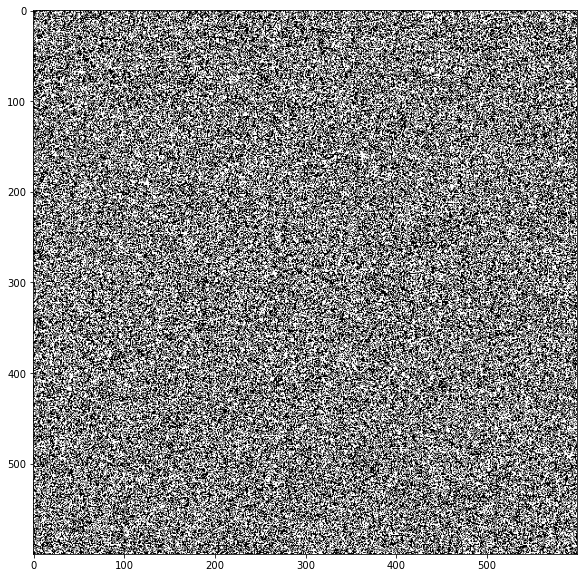

In [39]:
display_img(white_noise)

In [42]:
img.max()
img.min()

0.0

In [43]:
white_noise = white_noise * 255

In [44]:
white_noise

array([[255, 255, 255, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255,   0, 255],
       [  0,   0,   0, ...,   0, 255,   0],
       ...,
       [  0,   0, 255, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [45]:
noise_img = white_noise + img

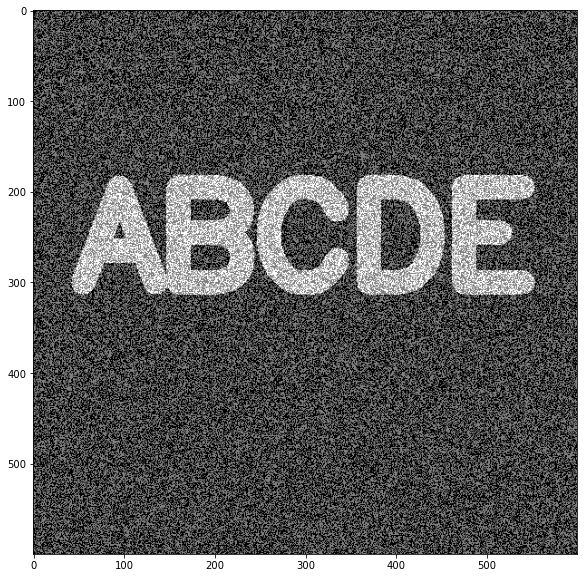

In [46]:
display_img(noise_img)

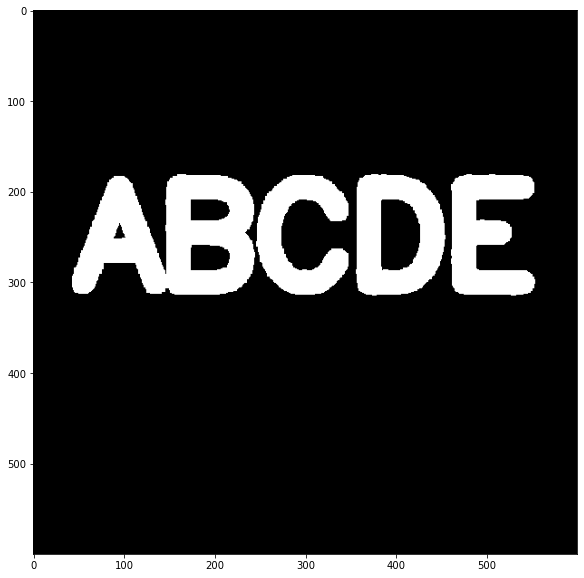

In [48]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN,kernel)
display_img(opening)

In [49]:
img = load_img()
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [50]:
black_noise

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 1, 0]])

In [51]:
black_noise = black_noise * -255

In [52]:
black_noise

array([[   0,    0,    0, ...,    0, -255,    0],
       [   0,    0, -255, ..., -255,    0,    0],
       [-255, -255, -255, ...,    0,    0, -255],
       ...,
       [   0,    0,    0, ...,    0, -255, -255],
       [   0, -255,    0, ...,    0,    0,    0],
       [-255, -255,    0, ..., -255, -255,    0]])

In [53]:
black_noise_img = img + black_noise

In [54]:
black_noise_img

array([[   0.,    0.,    0., ...,    0., -255.,    0.],
       [   0.,    0., -255., ..., -255.,    0.,    0.],
       [-255., -255., -255., ...,    0.,    0., -255.],
       ...,
       [   0.,    0.,    0., ...,    0., -255., -255.],
       [   0., -255.,    0., ...,    0.,    0.,    0.],
       [-255., -255.,    0., ..., -255., -255.,    0.]])

In [57]:
black_noise_img[black_noise_img == -255] = 0

In [59]:
black_noise_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

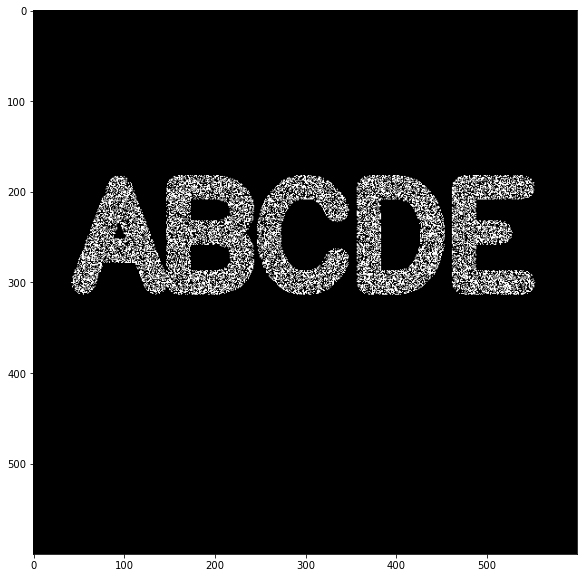

In [58]:
display_img(black_noise_img)

In [60]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)

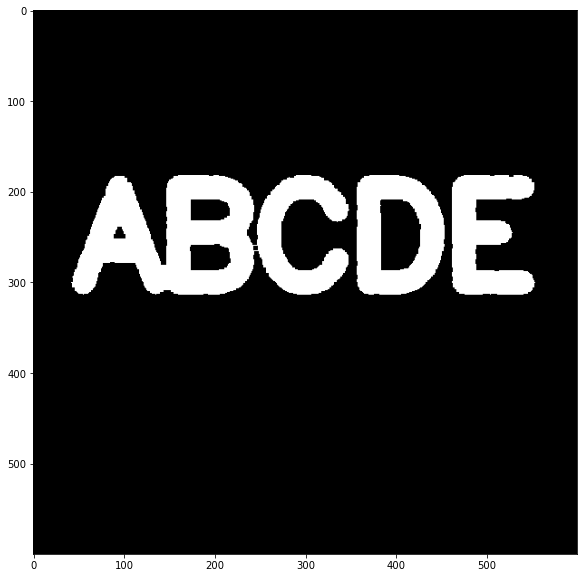

In [61]:
display_img(closing)

In [62]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT,kernel)

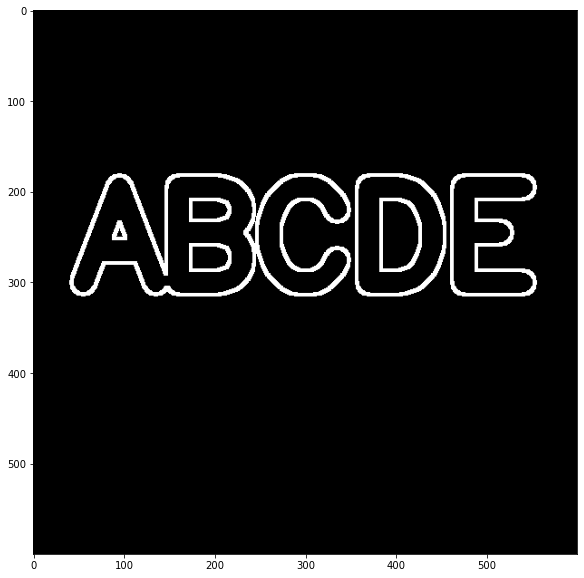

In [63]:
display_img